In [1]:
def integrant(x):
    f=1/(1+x**2)
    return f

In [2]:
#台形公式
def calc_integral_trapezoid(m):
    s=0
    for i in range(m):
        s+=(1/2)*(1/m)*(integrant(i/m)+integrant((i+1)/m)) #1/m=h,x_i=i/m
    return s

#Mを100とする
calc_integral_trapezoid(100)

0.7853939967307827

In [3]:
# 複合Simpson則
def calc_integral_simpson(m):
    s = 0
    for i in range(m):
        s += (
            (1 / 3)
            * (1 / (2 * m))
            * (
                (integrant(i / m))
                + 4 * integrant((2 * i + 1) / (2 * m))
                + integrant((i + 1) / m)
            )
        )  # 1/2m=h
    return s


# Mを100とする
calc_integral_simpson(100)

0.7853981633974481

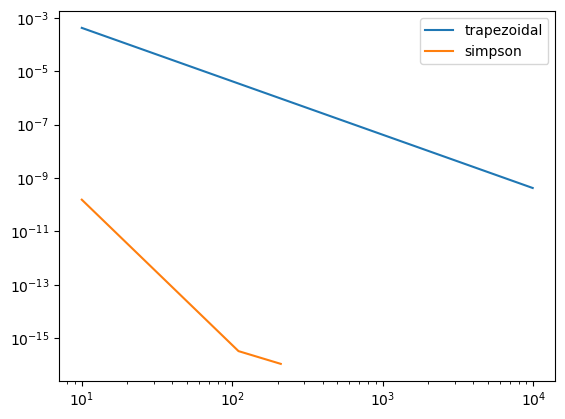

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages("1SC22317Y01b02.pdf")

x = np.arange(10, 10000, 100)
y1 = [np.abs(calc_integral_trapezoid(i) - np.pi / 4) for i in x]
y2 = [np.abs(calc_integral_simpson(i) - np.pi / 4) for i in x[0:3]]
fig, axes = plt.subplots()
axes.plot(x, y1, label="trapezoidal")
axes.plot(x[0:3], y2, label="simpson")
axes.legend(loc=0)
# plt.plot(x,y1)
# plt.plot(x[0:3],y2)
plt.xscale("log")
plt.yscale("log")
plt.show()

pdf.savefig(fig)
pdf.close()